<a href="https://colab.research.google.com/github/ics-projects/ML-Lab2-Clone/blob/master/CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## (i) Datapreprocessing

### Dataset charachteristics
https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset

In [ ]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
Y = cal_housing.target
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Missing Values
According to the dataset description, there are no missing values. We will move on to encoding

In [ ]:
missing_value_cols = list(X.columns[X.isna().any()])
print(len(missing_value_cols))

0


### Encoding

There is no nominal data

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns
categorical_features

Index([], dtype='object')

There also isn't any ordinal data

In [ ]:
print(len(X.select_dtypes(include=['int64', 'float64']).columns)==len(X.columns))

True


All the data seems to be interval and ratio data, therefore we can move on to feature selection

### Feature Selection

Find out features that account for 90% of the variance

In [ ]:
variance_threshold = 0.90
X_copy = StandardScaler().fit_transform(X)

pca = PCA()
principle_components = pca.fit_transform(X_copy)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

no_of_variables = sum(x <= variance_threshold for x in cumulative_variance)
print("PCs needed: ", no_of_variables)

[0.25336868 0.48853113 0.64741747 0.77629718 0.90167913 0.98410164
 0.99430186 1.        ]
PCs needed:  4


In [ ]:
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=4)
principle_components = pca.fit_transform(X)

principal_df = pd.DataFrame(data = principle_components, columns = ['component 1', 'component 2', 'component 3', 'component 4'])
print(principal_df)

       component 1  component 2  component 3  component 4
0         1.882704    -0.503362    -0.314134    -2.555093
1         1.371120    -0.121406     1.905258    -1.872984
2         2.086868    -0.501136    -0.937245    -2.100133
3         1.575801    -1.239495    -1.025957    -1.286721
4         1.591206    -1.345264    -1.249171    -0.450778
...            ...          ...          ...          ...
20635     1.386779    -1.296137     0.054262     1.063026
20636     1.875219    -0.671533     0.155700     0.644612
20637     1.402357    -1.096426     0.567135     1.090397
20638     1.542943    -1.059408     0.365472     0.968799
20639     1.405516    -0.896727     0.896812     0.900237

[20640 rows x 4 columns]


## (ii) Pairplot

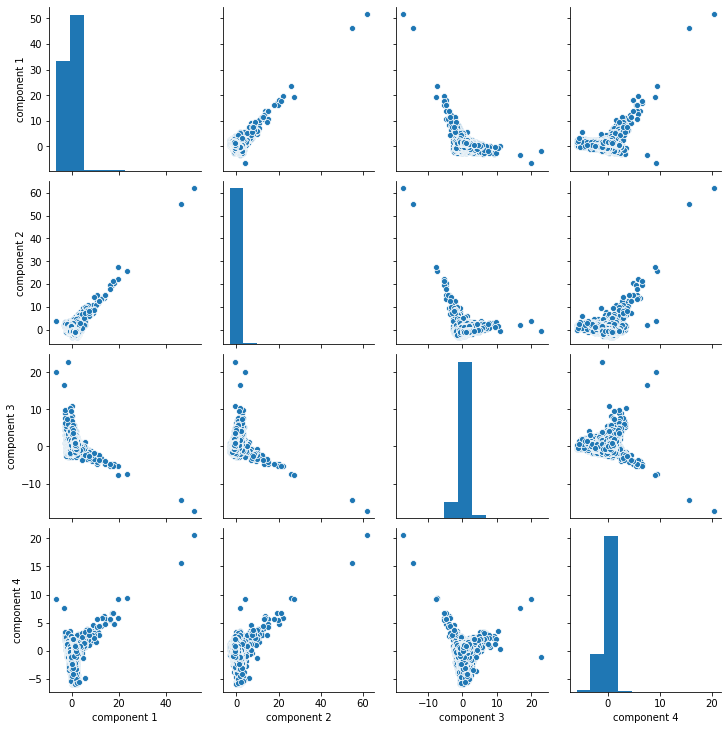

In [ ]:
sns.pairplot(principal_df)

From the pairplot we can see that most of the variables have a strong positve correlation.